# Quickstart of SuPy

This quickstart demonstrates the essential and simplest workflow of `supy` in SUEWS simulation:

1. [load SUEWS input files](#Load-SUEWS-input-files)
2. [run SUEWS simulation](#Run-SUEWS-simulations)
3. [examine SUEWS results](#Examine-SUEWS-results)

More advanced use of `supy` are available in the [tutorials](tutorial)

Before start, we need to load the following necessary packages.

In [1]:
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
get_ipython().run_line_magic('matplotlib', 'inline')


## Load SUEWS input files

First, a path to SUEWS `RunControl.nml` should be specified, which will direct `supy` to locate input files.

In [2]:
path_runcontrol=Path('../sample_run')/'RunControl.nml'


### Model configuration

We call `sp.init_supy_df` to initialise a SUEWS simulation and get two `pandas` objects (note: the following names CAN be customised and are NOT fixed to the examples shown here):

`df_state_init`: a `DataFrame` for grid-specific settings

Once loaded in, these objects CAN be modified and reused for conducting simulations that differ from the one configured via input files under the above `dir_start`.

In [3]:
df_state_init = sp.init_supy_df(path_runcontrol)


A sample `df_state_init` looks below (note that `.T` is used here to a nicer tableform view):

In [4]:
df_state_init.filter(like='method').T


,grid,1
var,ind_dim,
aerodynamicresistancemethod,0,2
evapmethod,0,2
disaggmethod,0,1
disaggmethodestm,0,1
raindisaggmethod,0,100
emissionsmethod,0,2
netradiationmethod,0,3
roughlenheatmethod,0,2
roughlenmommethod,0,2


### Meteorological forcing

Following the convention of SUEWS, `supy` loads meteorological forcing (met-forcing) files at the grid level.

<div class="alert alert-info">

**Note:**

If `multiplemetfiles = 0` (i.e., all grids use the same met-forcing file) is set in `ser_mod_cfg`, the `grid` argument takes NO effect and is ignored by `supy`.

</div>

In [5]:
grid = df_state_init.index[0]
df_forcing = sp.load_forcing_grid(path_runcontrol, grid)


## Run SUEWS simulations

Once met-forcing (via `df_forcing`) and initial conditions (via `df_state_init`) are loaded in, we call `sp.run_supy` to conduct a SUEWS simulation, which will return two `pandas` `DataFrame`s: `df_output` and `df_state`.

In [6]:
df_output, df_state = sp.run_supy(df_forcing, df_state_init)


### `df_output`

`df_output` is an ensemble output collection of major SUEWS output groups, including:

* SUEWS: the essential SUEWS output variables
* DailyState: variables of daily state information
* snow: snow output variables (effective when `snowuse = 1` set in `ser_mod_cfg`)
* ESTM: ESTM output variables (not implemented yet)


In [7]:
df_output.columns.levels[0]


Index(['DailyState', 'ESTM', 'SUEWS', 'snow'], dtype='object', name='group')

### `df_state`

`df_state` is a `DataFrame` for holding:

1. all model states if `save_state` is set to `True` when calling `sp.run_supy` and `supy` may run significantly slower for a large simulation;
2. or, only the final state if `save_state` is set to `False` (the default setting) in which mode `supy` has a similar performance as the standalone compiled SUEWS executable.

Entries in `df_state` have the same data structure as `df_state_init` and can thus be used for other SUEWS simulations staring at the timestamp as in `df_state`.

In [8]:
df_state.T


grid                                                  1                    
datetime                            2012-01-01 00:05:00 2013-01-01 00:05:00
var                         ind_dim                                        
aerodynamicresistancemethod 0                      2.00                2.00
ah_min                      (0,)                  15.00               15.00
                            (1,)                  15.00               15.00
ah_slope_cooling            (0,)                   2.70                2.70
                            (1,)                   2.70                2.70
ah_slope_heating            (0,)                   2.70                2.70
                            (1,)                   2.70                2.70
ahprof_24hr                 (0, 0)                 0.57                0.57
                            (0, 1)                 0.65                0.65
                            (1, 0)                 0.45                0.45
                            (1, 1)                 0.49                0.49
                            (2, 0)                 0.43                0.43
                            (2, 1)                 0.46                0.46
                            (3, 0)                 0.40                0.40
                            (3, 1)                 0.47                0.47
                            (4, 0)                 0.40                0.40
                            (4, 1)                 0.47                0.47
                            (5, 0)                 0.45                0.45
                            (5, 1)                 0.53                0.53
                            (6, 0)                 0.71                0.71
                            (6, 1)                 0.70                0.70
                            (7, 0)                 1.20                1.20
                            (7, 1)                 1.13                1.13
                            (8, 0)                 1.44                1.44
                            (8, 1)                 1.37                1.37
                            (9, 0)                 1.29                1.29
                            (9, 1)                 1.37                1.37
                            (10, 0)                1.28                1.28
                            (10, 1)                1.30                1.30
                            (11, 0)                1.31                1.31
...                                                 ...                 ...
wuprofm_24hr                (11, 0)             -999.00             -999.00
                            (11, 1)             -999.00             -999.00
                            (12, 0)             -999.00             -999.00
                            (12, 1)             -999.00             -999.00
                            (13, 0)             -999.00             -999.00
                            (13, 1)             -999.00             -999.00
                            (14, 0)             -999.00             -999.00
                            (14, 1)             -999.00             -999.00
                            (15, 0)             -999.00             -999.00
                            (15, 1)             -999.00             -999.00
                            (16, 0)             -999.00             -999.00
                            (16, 1)             -999.00             -999.00
                            (17, 0)             -999.00             -999.00
                            (17, 1)             -999.00             -999.00
                            (18, 0)             -999.00             -999.00
                            (18, 1)             -999.00             -999.00
                            (19, 0)             -999.00             -999.00
                            (19, 1)             -999.00             -999.00
                            (20, 0)             

## Examine SUEWS results

Thanks to the functionality inherited from `pandas` and other packages under the [PyData](https://pydata.org) stack, compared with the standard SUEWS simulation workflow, `supy` enables more convenient examination of SUEWS results by statistics calculation, resampling, plotting (and many more).

### Ouptut structure

`df_output` is organised with `MultiIndex` `(grid,timestamp)` and `(group,varaible)` as `index` and `columns`, respectively.

In [9]:
df_output.head()


group                        SUEWS                                             \
var                          Kdown     Kup       Ldown         Lup      Tsurf   
grid datetime                                                                   
1    2012-01-01 00:05:00  0.153333  0.0184  344.310184  372.270369  11.775916   
     2012-01-01 00:10:00  0.153333  0.0184  344.310184  372.270369  11.775916   
     2012-01-01 00:15:00  0.153333  0.0184  344.310184  372.270369  11.775916   
     2012-01-01 00:20:00  0.153333  0.0184  344.310184  372.270369  11.775916   
     2012-01-01 00:25:00  0.153333  0.0184  344.310184  372.270369  11.775916   

group                                                               ...  \
var                              QN   QF         QS         QH   QE ...   
grid datetime                                                       ...   
1    2012-01-01 00:05:00 -27.825251  0.0 -59.305405  31.480154  0.0 ...   
     2012-01-01 00:10:00 -27.825251  0.0 -59.305405  31.480154  0.0 ...   
     2012-01-01 00:15:00 -27.825251  0.0 -59.305405  31.480154  0.0 ...   
     2012-01-01 00:20:00 -27.825251  0.0 -59.305405  31.480154  0.0 ...   
     2012-01-01 00:25:00 -27.825251  0.0 -59.305405  31.480154  0.0 ...   

group                    DailyState                                   \
var                        DSnowPvd DSnowBldgs DSnowEveTr DSnowDecTr   
grid datetime                                                          
1    2012-01-01 00:05:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:10:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:15:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:20:00        NaN        NaN        NaN        NaN   
     2012-01-01 00:25:00        NaN        NaN        NaN        NaN   

group                                                                  
var                      DSnowGrass DSnowBSoil DSnowWater  a1  a2  a3  
grid datetime                                                          
1    2012-01-01 00:05:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:10:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:15:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:20:00        NaN        NaN        NaN NaN NaN NaN  
     2012-01-01 00:25:00        NaN        NaN        NaN NaN NaN NaN  

[5 rows x 245 columns]

Here we demonstrate several typical scenarios for SUEWS results examination.

The essential `SUEWS` output collection is extracted as a separate variable for easier processing in the following sections. More [advanced slicing techniques](http://pandas.pydata.org/pandas-docs/stable/advanced.html#multiindex-advanced-indexing) are available in `pandas` documentation.

In [10]:
df_output_suews=df_output['SUEWS']


### Statistics Calculation

We can use `.describe()` method for a quick overview of the key surface energy balance budgets.

In [11]:
df_output_suews.loc[:,['QN','QS','QH','QE','QF']].describe()


var,QN,QS,QH,QE,QF
count,105408.000000,105408.000000,105408.000000,105408.000000,105408.0
mean,43.081257,-1.445639,38.919791,5.607106,0.0
std,136.460171,110.329108,28.140539,11.114066,0.0
min,-85.761254,-106.005046,-47.936665,0.000000,0.0
25%,-41.721110,-70.226380,25.145524,0.000000,0.0
50%,-25.250982,-56.777049,29.060547,0.000000,0.0
75%,78.312289,27.954955,45.300129,5.963117,0.0
max,698.440633,514.869939,184.333229,129.105145,0.0


### Plotting

Plotting is very straightforward via the `.plot` method bounded with `pandas` objects.

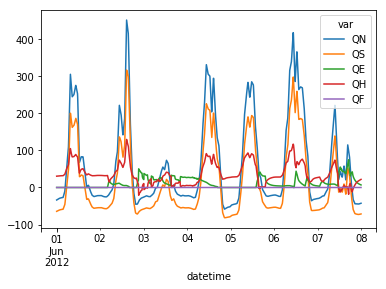

In [12]:
df_output_suews.loc[1].loc[
    '2012 6 1':'2012 6 7',
    ['QN','QS','QE','QH','QF']
].plot()


### Resampling

The suggested runtime/simulation frequency of SUEWS is `300 s`, which usually results a large output and may be over-weighted for storage. To slim down the output size, we can `resample` the default output.

In [13]:
df_output_suews_rsmp=df_output_suews.loc[1].resample('1h').mean()



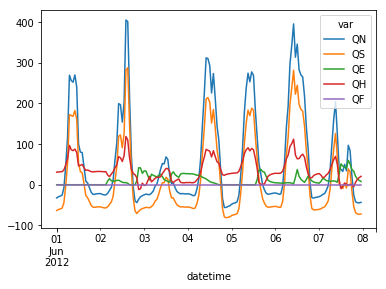

In [14]:
df_output_suews_rsmp.loc[
    '2012 6 1':'2012 6 7',
    ['QN','QS','QE','QH','QF']].plot()


The resampled output can be outputed for a smaller file.

In [15]:
df_output_suews_rsmp.to_csv('suews_1h.txt',
                            sep='\t',
                            float_format='%8.2f',
                            na_rep=-999)


For a justified format, we use the `to_string` for better format controlling and write the formatted string out to a file.

In [16]:
str_out=df_output_suews_rsmp.to_string(
    float_format='%8.2f',
    na_rep='-999',
    justify='right')
with open('suews_sample.txt','w') as file_out:
    print(str_out,file=file_out)


